import matplotlib as mp
import seaborn as sb
import pandas as pd 
import numpy as np
from numpy import math
from matplotlib import pyplot as plt
import seaborn as sb

In [2]:
df=pd.read_csv("winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.shape

(1599, 12)

In [5]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

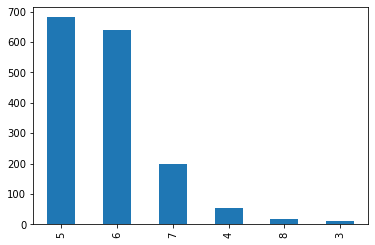

In [7]:
df["quality"].value_counts().plot(kind="bar")
plt.show()

In [53]:
temp=pd.DataFrame({"quality": df["quality"]})
counts=temp.value_counts()
counts

quality
5          681
6          638
7          199
4           53
8           18
3           10
dtype: int64

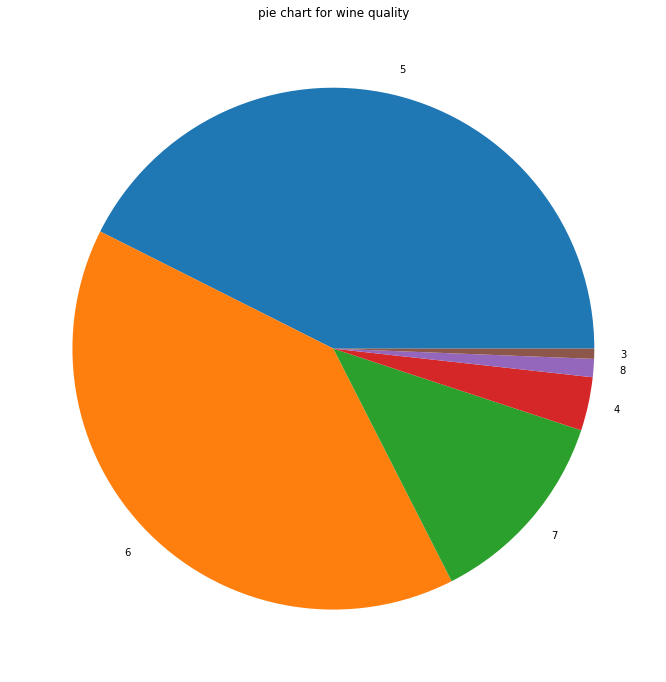

In [54]:
labels=[X[0] for X in counts.keys()]
bar ,ax = plt.subplots(figsize=(20,12))
ax=plt.pie(x=counts,labels=labels)
plt.title("pie chart for wine quality")
plt.show()

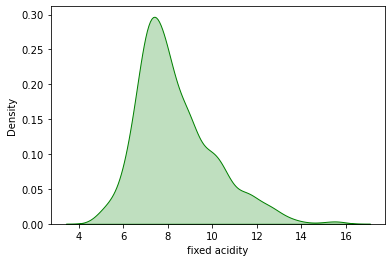

In [9]:
sb.kdeplot(df["fixed acidity"],color="green",shade=True) 
plt.show()

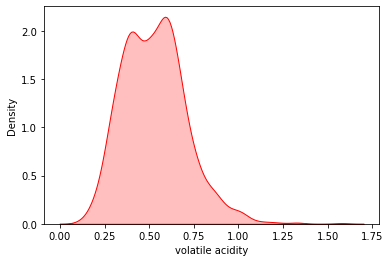

In [11]:
sb.kdeplot(df["volatile acidity"],color="red",shade=True) 
plt.show()

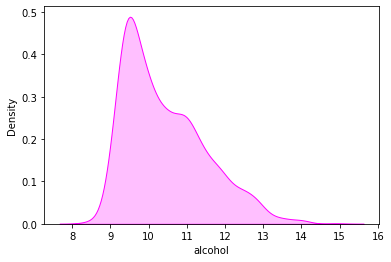

In [31]:
sb.kdeplot(df["alcohol"],color="magenta",shade=True) 
plt.show()

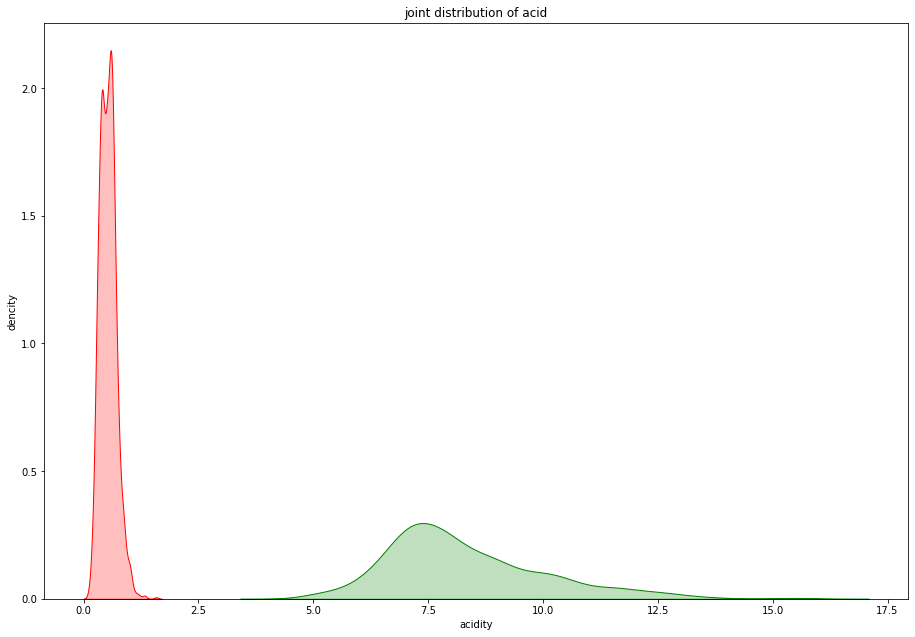

In [13]:
fig=plt.figure()
ax=fig.add_axes([0,0,2,2])
ax.set_title("joint distribution of acid")
ax.set_xlabel("acidity")
ax.set_ylabel("dencity")
ax=sb.kdeplot(df["fixed acidity"],color="green",shade=True) 
ax=sb.kdeplot(df["volatile acidity"],color="red",shade=True)
plt.show()

In [15]:
col_df=df.columns

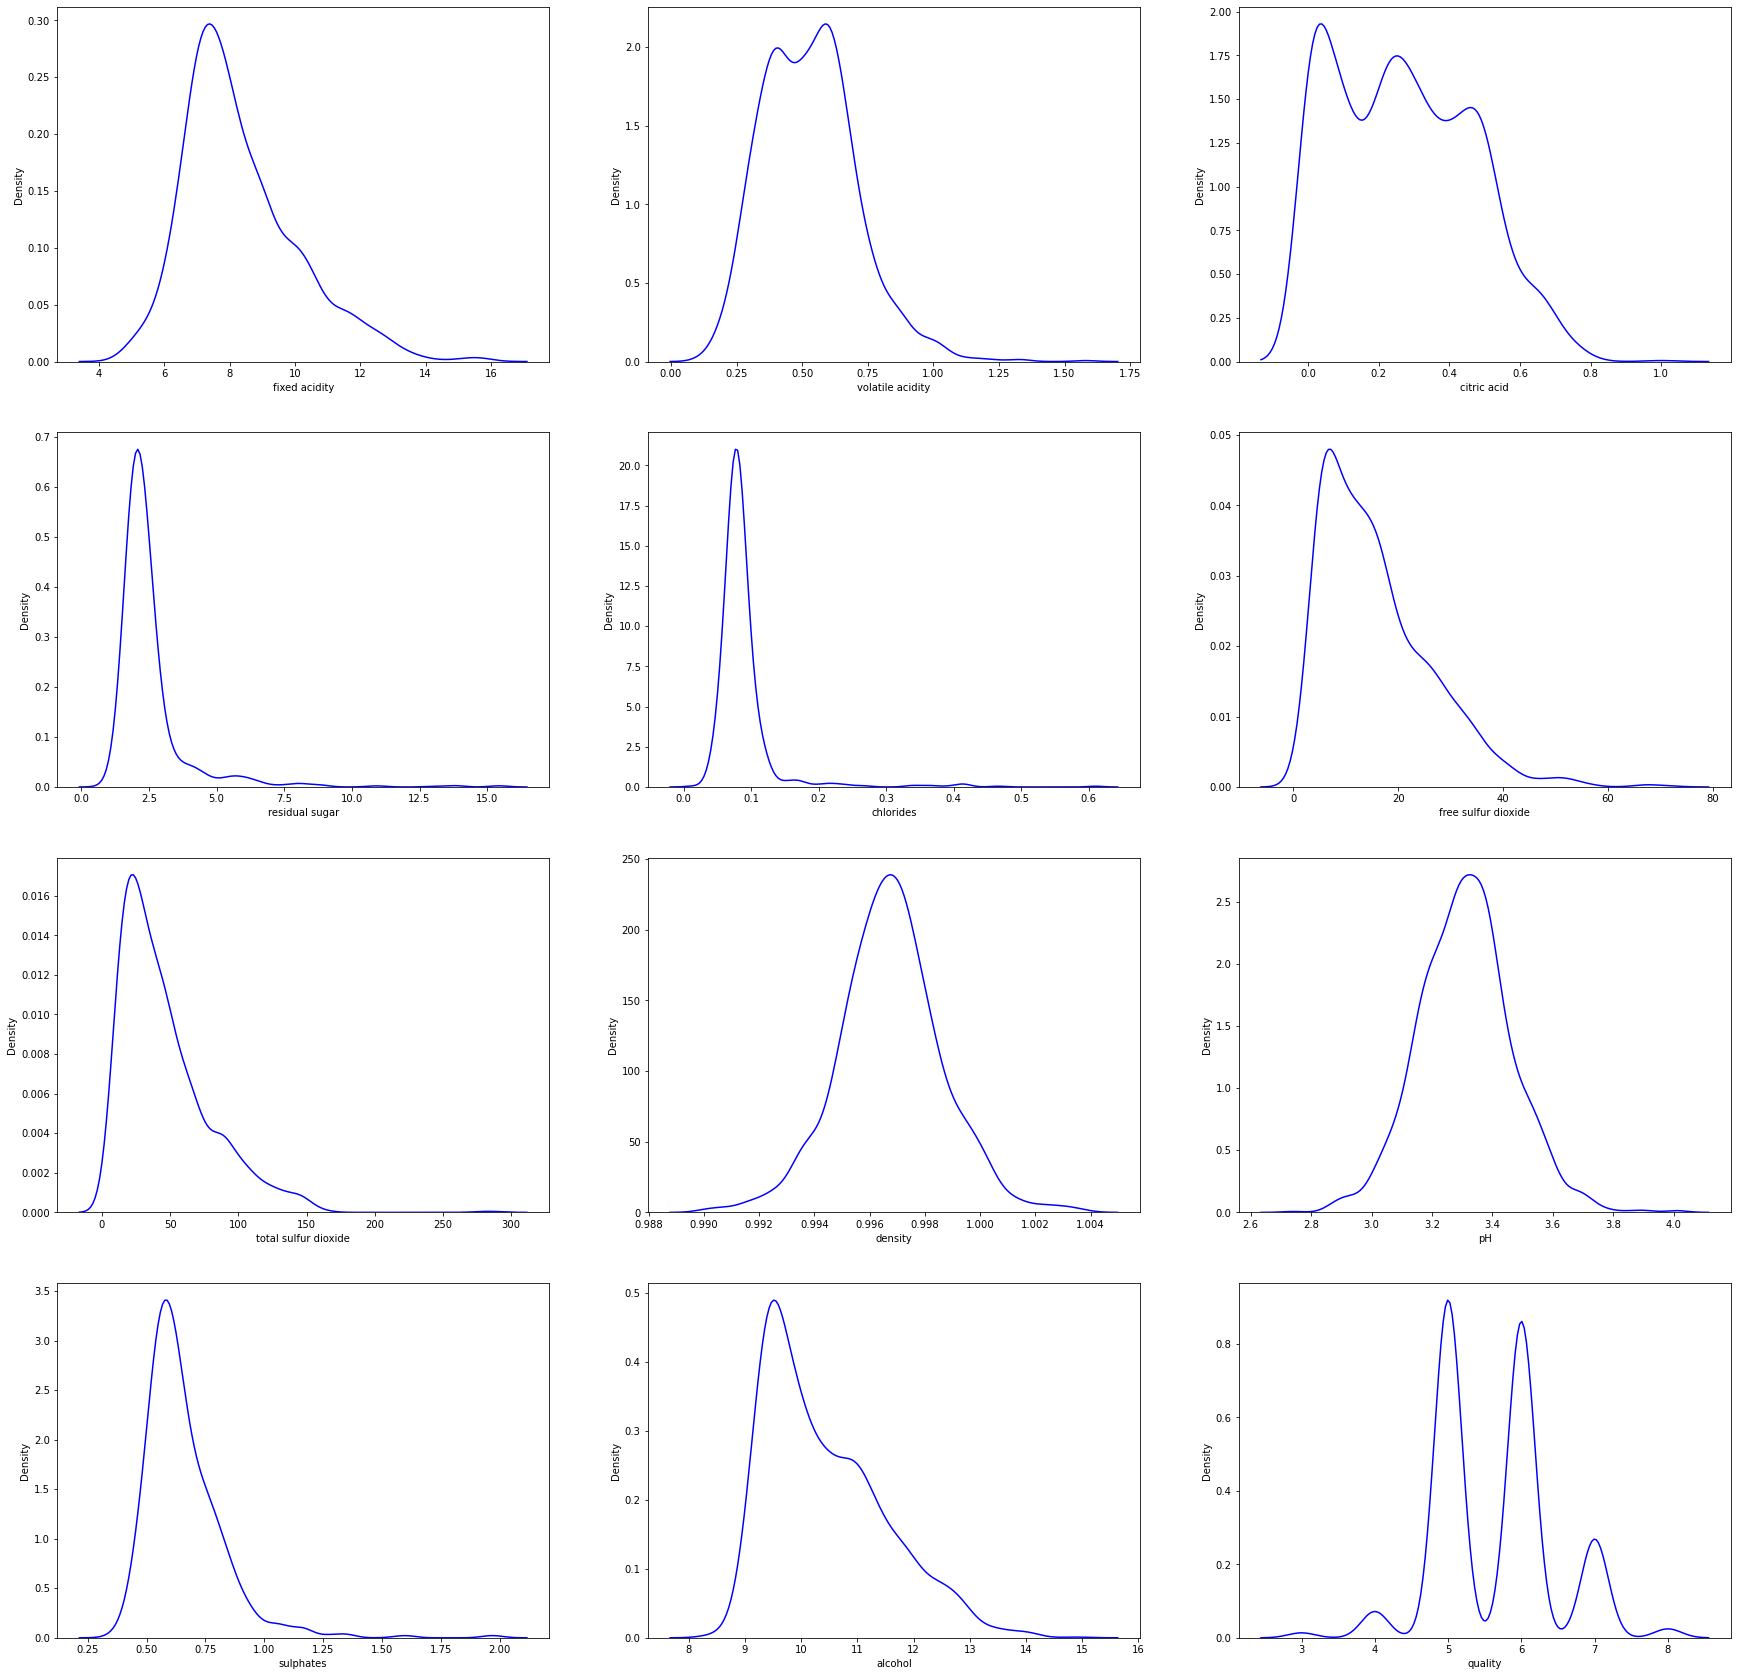

In [29]:
plt.figure(figsize=(30, 30))

for i, column in enumerate(col_df, 1):
    plt.subplot(4,3 , i)
    sb.kdeplot(df[column],color="b",shade=False) 
    plt.xlabel(column)
   

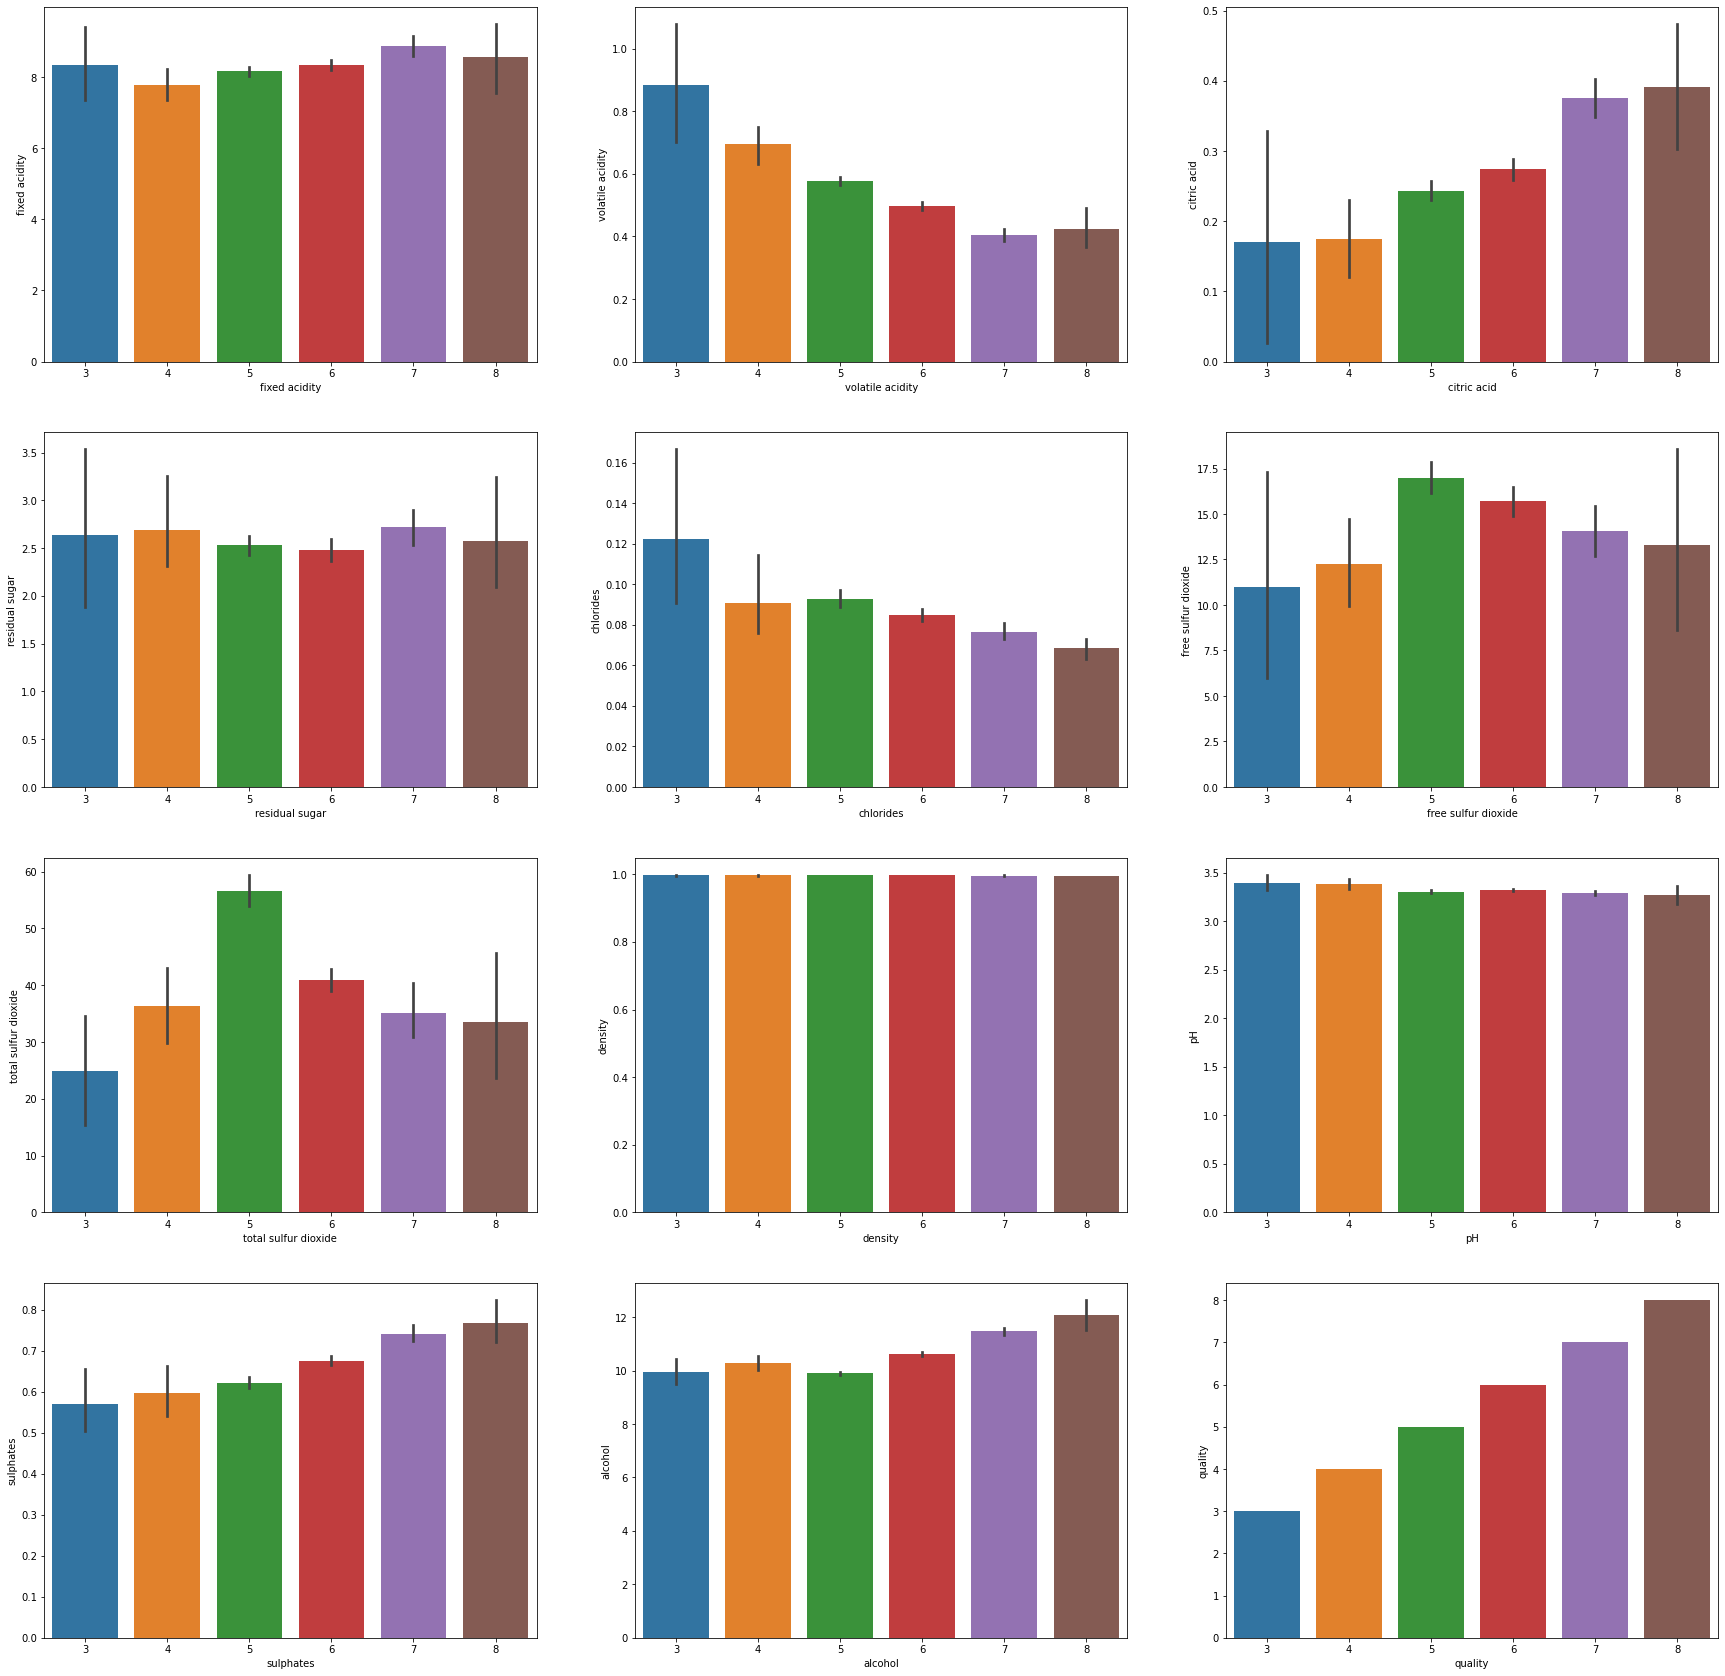

In [33]:
plt.figure(figsize=(30, 30))

for i, column in enumerate(col_df, 1):
    plt.subplot(4,3 , i)
    sb.barplot(x="quality",y=df[column],data=df)
    plt.xlabel(column)
   

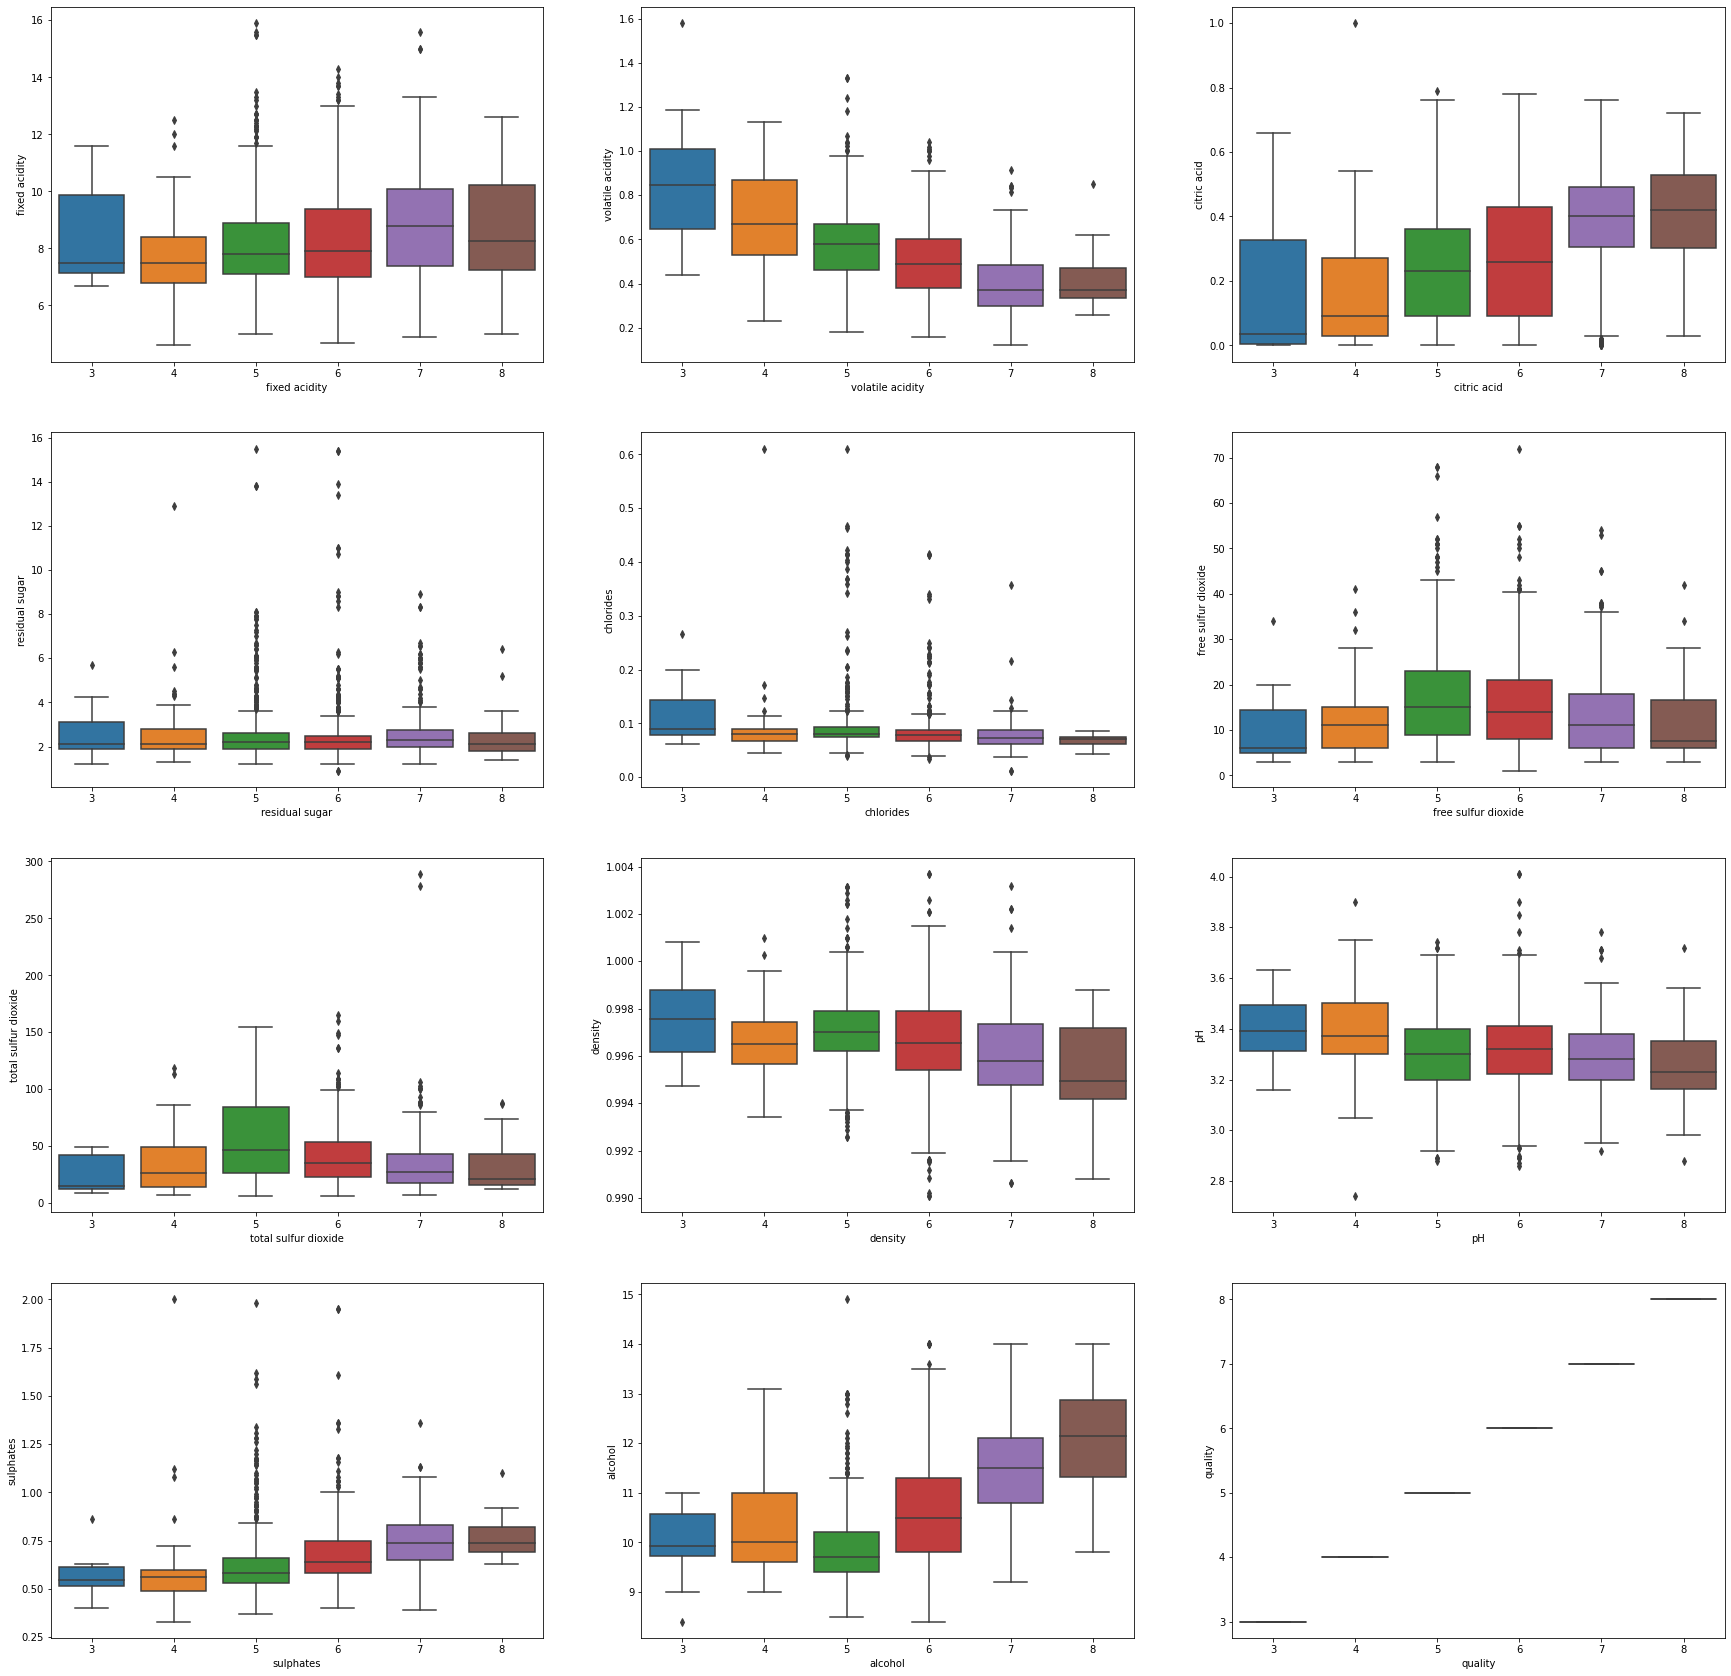

In [34]:
plt.figure(figsize=(30, 30))

for i, column in enumerate(col_df, 1):
    plt.subplot(4,3 , i)
    sb.boxplot(x="quality",y=df[column],data=df,orient="v")
    plt.xlabel(column)

In [35]:
corr=df.corr()

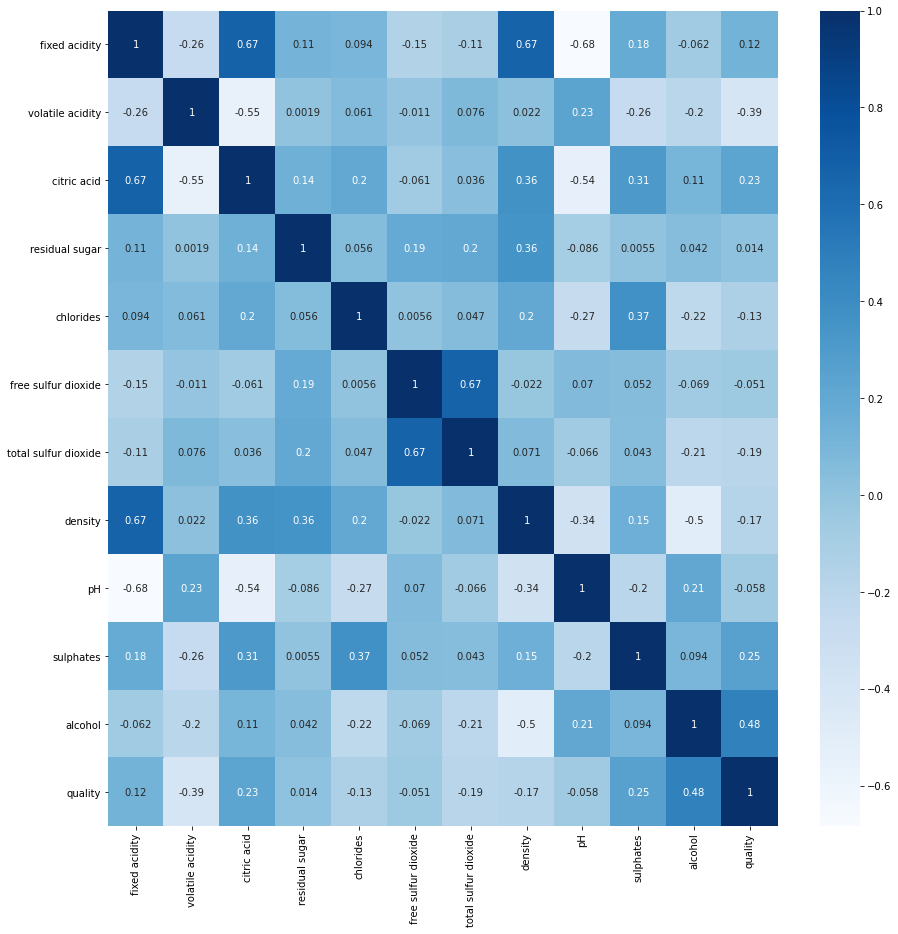

In [38]:
fig,ax=plt.subplots(figsize=(15,15))
ax=sb.heatmap(corr,annot=True,cmap="Blues")

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.ensemble import RandomForestClassifier



In [43]:
X=df.drop("quality",axis=1)

In [44]:
X.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8


In [46]:
y=df["quality"].apply(lambda y_value=1 : 1 if y_value>=7 else 0)
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


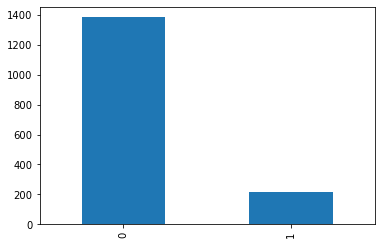

In [55]:
y.value_counts().plot(kind="bar")
plt.show()

In [49]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.33, random_state=42)

In [50]:
ran_f=RandomForestClassifier()
ran_f.fit(X_train,y_train)

RandomForestClassifier()

In [51]:
y_pred=ran_f.predict(X_test)

In [52]:
accuracy_score(y_test,y_pred)

0.8863636363636364